# <b>Assignment : DT</b>

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 3, 10, 30], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sarve\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


sentiment score for sentence 1 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
sentiment score for sentence 2 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
sentiment score for sentence 3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


## Making Data Ready

In [3]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')
data.head()

school_state teacher_prefix project_grade_category  \
0           ca            mrs          grades_prek_2   
1           ut             ms             grades_3_5   
2           ca            mrs          grades_prek_2   
3           ga            mrs          grades_prek_2   
4           wa            mrs             grades_3_5   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   
2                                            10                    1   
3                                             2                    1   
4                                             2                    1   

    clean_categories                 clean_subcategories  \
0       math_science  appliedsciences health_lifescience   
1       specialneeds                        specialneeds   
2  literacy_language                            literacy   
3    appliedlearning                    earlydevelopment   
4  literacy_language                            literacy   

                                               essay   price  
0  i fortunate enough use fairy tale stem kits cl...  725.05  
1  imagine 8 9 years old you third grade classroo...  213.03  
2  having class 24 students comes diverse learner...  329.00  
3  i recently read article giving students choice...  481.04  
4  my students crave challenge eat obstacles brea...   17.74

In [4]:
neg = []
pos = []
neu = []
comp = []

def update_sentiments(values):           # Calculating sentiment scores
    
    neg.append(values["neg"])    
    pos.append(values["pos"])
    neu.append(values["neu"])
    comp.append(values["compound"])

In [5]:
for essay in tqdm(data["essay"]):
    update_sentiments(sid.polarity_scores(essay))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [02:53<00:00, 629.31it/s]


In [6]:
data["neg"] = neg   # adding new features based on Sentiment scores
data["pos"] = pos
data["neu"] = neu
data["compound"] = comp

data.head()

school_state teacher_prefix project_grade_category  \
0           ca            mrs          grades_prek_2   
1           ut             ms             grades_3_5   
2           ca            mrs          grades_prek_2   
3           ga            mrs          grades_prek_2   
4           wa            mrs             grades_3_5   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   
2                                            10                    1   
3                                             2                    1   
4                                             2                    1   

    clean_categories                 clean_subcategories  \
0       math_science  appliedsciences health_lifescience   
1       specialneeds                        specialneeds   
2  literacy_language                            literacy   
3    appliedlearning                    earlydevelopment   
4  literacy_language                            literacy   

                                               essay   price    neg    pos  \
0  i fortunate enough use fairy tale stem kits cl...  725.05  0.013  0.205   
1  imagine 8 9 years old you third grade classroo...  213.03  0.072  0.248   
2  having class 24 students comes diverse learner...  329.00  0.017  0.262   
3  i recently read article giving students choice...  481.04  0.030  0.187   
4  my students crave challenge eat obstacles brea...   17.74  0.029  0.288   

     neu  compound  
0  0.783    0.9867  
1  0.680    0.9897  
2  0.721    0.9860  
3  0.783    0.9524  
4  0.683    0.9873

### Splitting Data Into Train And test: Stratified Sampling


In [7]:
X = data.drop(['project_is_approved'], axis=1)
y = data['project_is_approved'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y,random_state=42)

print(len(y_train))
print(len(y_test))

73196
36052


### Encoding text feature : Essay (TFIDF Vectorizer)


In [8]:
tfidf = TfidfVectorizer(min_df=10,max_features=5000)
text_tfidf = tfidf.fit(X_train['essay'].values)

X_train_tfidf =tfidf.transform(X_train['essay'].values)
X_test_tfidf =tfidf.transform(X_test['essay'].values)

print("After vectorization :")
print(X_train_tfidf.shape, y_train.shape)
print(X_test_tfidf.shape, y_test.shape)

After vectorization :
(73196, 5000) (73196,)
(36052, 5000) (36052,)


### Encoding text feature : Essay (TFIDF W2V Vectorizer)


In [9]:
import pickle
with open (r'glove_vectors', "rb") as f:
    model = pickle.load(f)
    glove_words = set(model.keys())

In [10]:
tfidf1 = TfidfVectorizer()
tfidf1.fit(X_train["essay"])     # Creating a dictionary with features(words) as a key, and the idf as a value
features = set(tfidf1.get_feature_names())
dictionary = dict(zip(features, list(tfidf1.idf_)))

In [11]:
#encoding the training dataset

X_train_w2v = []                                  # the tfidf-w2v for each essay will be stored in this
for sentence in tqdm(X_train["essay"]):
    null = np.zeros(300) 
    tfidf_wt =0; 
    for word in sentence.split(): 
        if (word in glove_words) and (word in features):
            vec = model[word]
            tfidf_value = dictionary[word]*(sentence.count(word)/len(sentence.split())) 
            tfidf_wt += tfidf_value
    if tfidf_wt != 0:
        null /= tfidf_wt
    X_train_w2v.append(null)
X_train_w2v=np.array(X_train_w2v)    

print("After vectorization :")
print(X_train_w2v.shape, y_train.shape)

100%|███████████████████████████████████████████████████████████████████████████| 73196/73196 [01:43<00:00, 705.64it/s]


After vectorization :
(73196, 300) (73196,)


In [12]:
#encoding the test dataset

X_test_w2v = []                                  # the tfidf-w2v for each essay will be stored in this
for sentence in tqdm(X_test["essay"]):
    null = np.zeros(300) 
    tfidf_wt =0; 
    for word in sentence.split(): 
        if (word in glove_words) and (word in features):
            vec = model[word]
            tfidf_value = dictionary[word]*(sentence.count(word)/len(sentence.split())) 
            tfidf_wt += tfidf_value
    if tfidf_wt != 0:
        null /= tfidf_wt
    X_test_w2v.append(null)
X_test_w2v=np.array(X_test_w2v)    

print("After vectorization :")
print(X_test_w2v.shape, y_test.shape)

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [00:50<00:00, 707.00it/s]


After vectorization :
(36052, 300) (36052,)


### Encoding Categorical Features

#### School State


In [13]:
state = CountVectorizer()
state.fit(X_train['school_state'].values)

X_train_state = state.transform(X_train['school_state'].values)
X_test_state = state.transform(X_test['school_state'].values)

print("After vectorization:")
print(X_train_state.shape, y_train.shape)
print(X_test_state.shape, y_test.shape)

After vectorization:
(73196, 51) (73196,)
(36052, 51) (36052,)


#### teacher_prefix

In [14]:
prefix = CountVectorizer()
prefix.fit(X_train['teacher_prefix'].values)

X_train_teacher = prefix.transform(X_train['teacher_prefix'].values)
X_test_teacher = prefix.transform(X_test['teacher_prefix'].values)

print("After vectorization:")
print(X_train_teacher.shape, y_train.shape)
print(X_test_teacher.shape, y_test.shape)

After vectorization:
(73196, 5) (73196,)
(36052, 5) (36052,)


#### project_grade_category

In [15]:
grade = CountVectorizer()
grade.fit(X_train['project_grade_category'].values)

X_train_grade = grade.transform(X_train['project_grade_category'].values)
X_test_grade = grade.transform(X_test['project_grade_category'].values)

print("After vectorization :")
print(X_train_grade.shape, y_train.shape)
print(X_test_grade.shape, y_test.shape)

After vectorization :
(73196, 4) (73196,)
(36052, 4) (36052,)


#### clean_categories

In [16]:
category = CountVectorizer()
category.fit(X_train['clean_categories'].values)

X_train_category = category.transform(X_train['clean_categories'].values)
X_test_category = category.transform(X_test['clean_categories'].values)

print("After vectorization :")
print(X_train_category.shape, y_train.shape)
print(X_test_category.shape, y_test.shape)

After vectorization :
(73196, 9) (73196,)
(36052, 9) (36052,)


#### clean_subcategories

In [17]:
sub = CountVectorizer()
sub.fit(X_train['clean_subcategories'].values)

X_train_subcategory = sub.transform(X_train['clean_subcategories'].values)
X_test_subcategory = sub.transform(X_test['clean_subcategories'].values)

print("After vectorization :")
print(X_train_subcategory.shape, y_train.shape)
print(X_test_subcategory.shape, y_test.shape)

After vectorization :
(73196, 30) (73196,)
(36052, 30) (36052,)


### Encoding Numerical Features

In [18]:
# Combining all the numerical features into single DF and then encoding that DF

abc = X_train.drop(['school_state','teacher_prefix','project_grade_category','clean_categories','clean_subcategories','essay'], axis=1)
abc1 = X_test.drop(['school_state','teacher_prefix','project_grade_category','clean_categories','clean_subcategories','essay'], axis=1)
abc1.head(1)

teacher_number_of_previously_posted_projects  price    neg    pos  \
32248                                             1  67.22  0.048  0.376   

         neu  compound  
32248  0.576    0.9946

In [19]:
# normalizer.fit(abc) will rise an error Expected XX array, got 1D array instead:
# we can give columns as a list to resolve this problem

a = abc.values.tolist()
b = abc1.values.tolist()

In [20]:
normalizer = Normalizer()
normalizer.fit(a)

X_train_num = normalizer.transform(a)
X_test_num = normalizer.transform(b)

#X_train_price_norm =X_train_price_norm.reshape(-1,1)
#X_test_price_norm=X_test_price_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_num.shape, y_train.shape)
print(X_test_num.shape, y_test.shape)

After vectorizations
(73196, 6) (73196,)
(36052, 6) (36052,)


### Concatinating All The Features

#### SET-1

In [21]:
from scipy.sparse import hstack
X_tr_1 = hstack((X_train_tfidf, X_train_state, X_train_teacher, X_train_grade, X_train_category, X_train_subcategory,X_train_num)).tocsr()
X_te_1 = hstack((X_test_tfidf, X_test_state, X_test_teacher, X_test_grade, X_test_category, X_test_subcategory,X_test_num)).tocsr()

print(X_tr_1.shape)
print(X_te_1.shape)

(73196, 5105)
(36052, 5105)


#### SET-2

In [22]:
X_tr_2 = hstack((X_train_w2v, X_train_state, X_train_teacher, X_train_grade, X_train_category, X_train_subcategory,X_train_num)).tocsr()
X_te_2 = hstack((X_test_w2v, X_test_state, X_test_teacher, X_test_grade, X_test_category, X_test_subcategory,X_test_num)).tocsr()

print(X_tr_2.shape)
print(X_te_2.shape)

(73196, 405)
(36052, 405)


# <font color='red'> <b>Task - 1</b></font>

### DECISION TREE USING GRID SEARCH CV (SET - 1)


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param = {'max_depth': [1, 5, 10, 50], 
         'min_samples_split': [5, 10, 100, 500]}

dtc = DecisionTreeClassifier(class_weight='balanced',random_state = 0) 
clf = GridSearchCV(dtc, param, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_tr_1,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [24]:
tr_auc_1 = clf.cv_results_['mean_train_score']
tr_auc_std1 = clf.cv_results_['std_train_score']
te_auc_1 = clf.cv_results_['mean_test_score'] 
te_auc_std1 = clf.cv_results_['std_test_score']

best_max_depth1 = clf.best_params_["max_depth"]
best_min_samples_split1 = clf.best_params_["min_samples_split"]

print('Best score for set 1: ',clf.best_score_)
print('Best max_depth for set 1: ',best_max_depth1)
print('Best min_samples_split for set 1: ',best_min_samples_split1)

Best score for set 1:  0.6519568925953961
Best max_depth for set 1:  10
Best min_samples_split for set 1:  500


### Plotting Hyperparameter v AUC

In [25]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from itertools import repeat

max_depth = [1, 5, 10, 50]
min_samples_split = [5, 10, 100, 500]

x1= max_depth
y1= min_samples_split
z1= tr_auc_1
z2= te_auc_1

trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name="tr_auc_1")
trace2 = go.Scatter3d(x=x1,y=y1,z=z2, name="te_auc_1")
values = [trace1, trace2]

lay = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_samples_split'),
        zaxis = dict(title='AUC SCORE'),))

fig = go.Figure(data=values, layout=lay)
offline.iplot(fig, filename='3d-scatter-colorscale')


### ROC : Train And Test Data

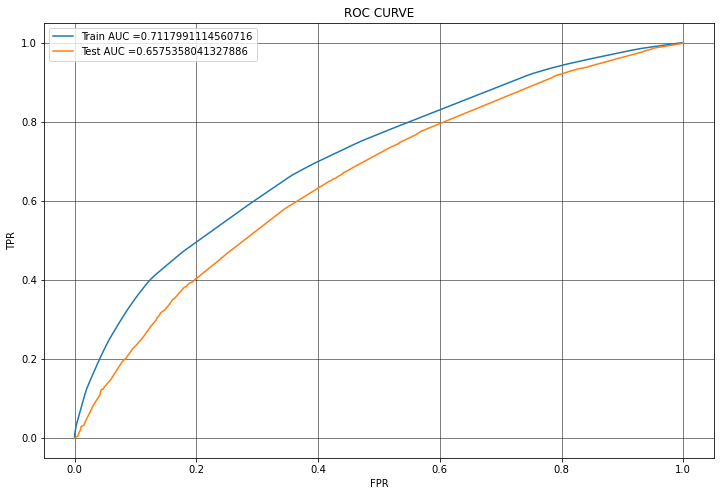

In [26]:
model1 = DecisionTreeClassifier(class_weight='balanced',max_depth = best_max_depth1,min_samples_split = best_min_samples_split1,random_state = 0)
model1.fit(X_tr_1,y_train)
y_tr_prob = clf.predict_proba(X_tr_1)[:,1]     # getting probability scores
y_te_prob = clf.predict_proba(X_te_1 )[:,1]

tr_fpr, tr_tpr, tr_thresh = roc_curve(y_train, y_tr_prob)       # getting fpr and tpr values
te_fpr, te_tpr, te_thresh = roc_curve(y_test, y_te_prob)

plt.figure(figsize=(12,8))
plt.plot(tr_fpr, tr_tpr, label="Train AUC ="+str(auc(tr_fpr, tr_tpr)))
plt.plot(te_fpr, te_tpr, label="Test AUC ="+str(auc(te_fpr, te_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.grid(color='black',lw=0.5)

### Confusion Matrix

In [27]:
def calc_best_threshold(thresh, fpr, tpr):
    
    t = thresh[np.argmax(tpr*(1-fpr))]  # it will be maximum when fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3), "\n")
    return t

def calc_predictions(prob, thresh):
    predictions = []
    for p in prob:
        if p>=thresh:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.42748908332336444 for threshold 0.512 

Confusion Matrix of Train Data :
 [[ 7164  3919]
 [21035 41078]]


Text(0.5, 1.0, 'Confusion Matrix of Train Data')

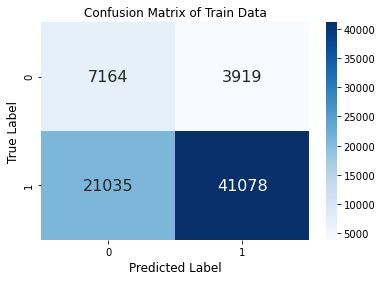

In [28]:
# For Train Data

best_t = calc_best_threshold(tr_thresh, tr_fpr, tr_tpr)
cm = metrics.confusion_matrix(y_train,calc_predictions(y_tr_prob, best_t))  # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Confusion Matrix of Train Data :\n",cm)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',annot_kws = {"size":16})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Confusion Matrix of Train Data',size=12)

the maximum value of tpr*(1-fpr) 0.3797257240192903 for threshold 0.524 

Confusion Matrix of Test Data :
 [[ 3575  1884]
 [12854 17739]]


Text(0.5, 1.0, 'Confusion Matrix of Train Data')

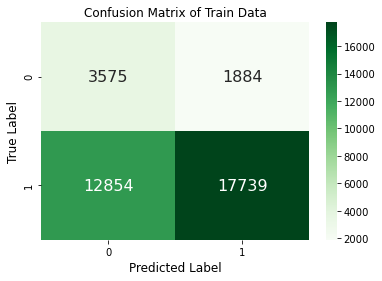

In [29]:
# For Test Data

best_t = calc_best_threshold(te_thresh, te_fpr, te_tpr)
cm = metrics.confusion_matrix(y_test,calc_predictions(y_te_prob, best_t))  # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Confusion Matrix of Test Data :\n",cm)
#print(cm)
sns.heatmap(cm, annot=True, fmt='d',cmap='Greens',annot_kws = {"size":16})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Confusion Matrix of Train Data',size=12)

### Getting All the False Positive Data Points

In [30]:
pred = calc_predictions(y_te_prob,best_t)

fp_count = []
for i in range(len(y_test)):
    if(y_test[i]==0) & (pred[i] == 1):
        fp_count.append(i)                    # GETTING THE ALL FALSE POSITIVE INDICES
len(fp_count)

1884

In [31]:
col = X_test.columns
X_test_fp = pd.DataFrame(columns=col)         # creating FALSE POSITIVE DF
X_test_fp = X_test.iloc[fp_count]
print(X_test_fp.shape)

X_test_fp.head(1)

(1884, 12)


school_state teacher_prefix project_grade_category  \
69487           sc            mrs             grades_3_5   

       teacher_number_of_previously_posted_projects  \
69487                                            10   

                     clean_categories   clean_subcategories  \
69487  literacy_language math_science  literacy mathematics   

                                                   essay   price    neg  \
69487  many students english language learners hard w...  228.89  0.039   

         pos    neu  compound  
69487  0.242  0.719    0.9794

### WordCloud for Essay for False Positive Dataset

In [32]:
#https://www.geeksforgeeks.org/generating-word-cloud-python

from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
sw = set(STOPWORDS)
for e in X_test_fp['essay']:
    val = str(e)                                       
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for words in tokens:
        comment_words = comment_words + words + ' '
        

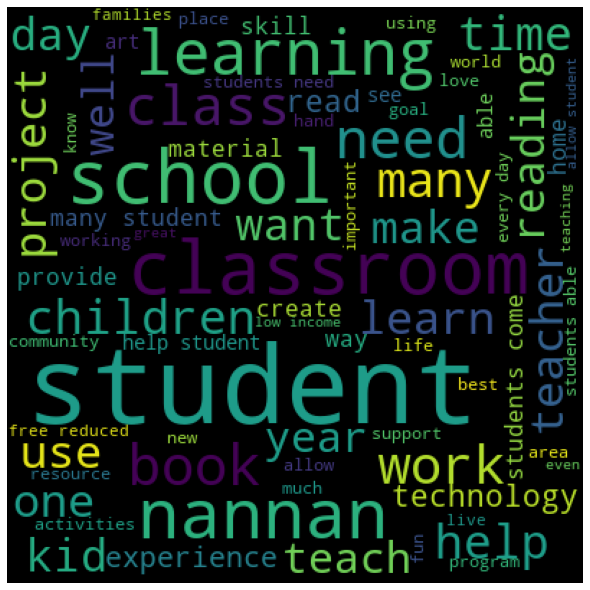

In [33]:
wrdcld = WordCloud(width = 400, height = 400, background_color ='black', stopwords = sw, min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wrdcld) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Box Plot for 'price' Of these False Positive Points


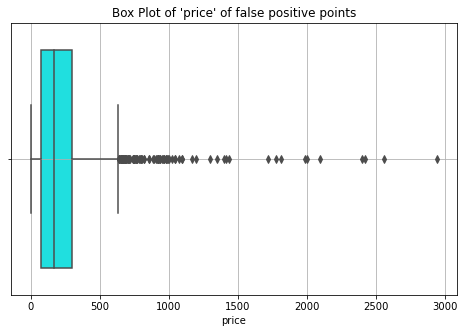

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot('price',data=X_test_fp,color='cyan').set_title("Box Plot of 'price' of false positive points")
plt.grid()

### Pdf Plot for 'teacher_number_of_previously_posted_projects' Of these False Positive Points


PDFs :  [0.84129512 0.09341826 0.03078556 0.01273885 0.01061571 0.0037155
 0.00424628 0.00106157 0.00106157 0.00106157]

bins :  [  0.   24.8  49.6  74.4  99.2 124.  148.8 173.6 198.4 223.2 248. ]


Text(0.5, 0, 'teacher_number_of_previously_posted_projects')

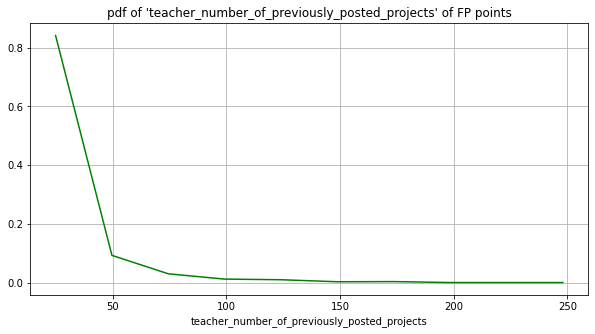

In [35]:
plt.figure(figsize=(10,5))
plt.grid()
counts, bin_edges = np.histogram(X_test_fp['teacher_number_of_previously_posted_projects'], bins=10, 
                                density = True)
pdf = counts/(sum(counts))
print("PDFs : ",pdf);
print("\nbins : ",bin_edges)
plt.plot(bin_edges[1:],pdf,color="green")
plt.title("pdf of 'teacher_number_of_previously_posted_projects' of FP points")
plt.xlabel('teacher_number_of_previously_posted_projects')

### DECISION TREE USING GRID SEARCH CV (SET - 2)

In [36]:
param = {'max_depth': [1, 5, 10, 50], 
         'min_samples_split': [5, 10, 100, 500]}

dtc = DecisionTreeClassifier(class_weight='balanced', random_state = 0) 
clf2 = GridSearchCV(dtc, param, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf2.fit(X_tr_2,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [37]:
tr_auc_2 = clf2.cv_results_['mean_train_score']
tr_auc_std2 = clf2.cv_results_['std_train_score']
te_auc_2 = clf2.cv_results_['mean_test_score'] 
te_auc_std2 = clf2.cv_results_['std_test_score']

best_max_depth2 = clf2.best_params_["max_depth"]
best_min_samples_split2 = clf2.best_params_["min_samples_split"]

print('Best score for set 2: ',clf2.best_score_)
print('Best max_depth for set 2: ',best_max_depth1)
print('Best min_samples_split for set 2: ',best_min_samples_split1)

Best score for set 2:  0.614839181083529
Best max_depth for set 2:  10
Best min_samples_split for set 2:  500


### Plotting Hyperparameter v AUC

In [38]:
max_depth = [1, 5, 10, 50]
min_samples_split = [5, 10, 100, 500]

x1= max_depth
y1= min_samples_split
z1= tr_auc_2
z2= te_auc_2

trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name="tr_auc_2")
trace2 = go.Scatter3d(x=x1,y=y1,z=z2, name="te_auc_2")
values = [trace1, trace2]

lay = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_samples_split'),
        zaxis = dict(title='AUC SCORE'),))

fig = go.Figure(data=values, layout=lay)
offline.iplot(fig, filename='3d-scatter-colorscale')


### ROC : Train And Test Data

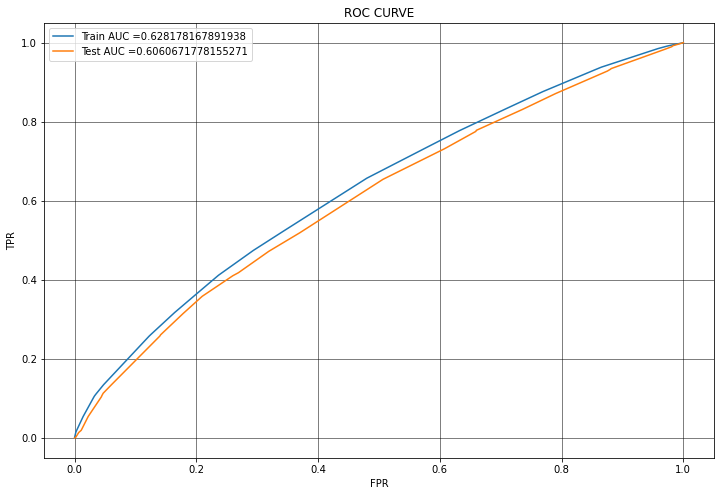

In [39]:
model2 = DecisionTreeClassifier(class_weight='balanced',max_depth = best_max_depth2,min_samples_split = best_min_samples_split2, random_state = 0)
model2.fit(X_tr_2,y_train)
y_tr_prob2 = clf2.predict_proba(X_tr_2)[:,1]     # getting probability scores
y_te_prob2 = clf2.predict_proba(X_te_2 )[:,1]

tr_fpr2, tr_tpr2, tr_thresh2 = roc_curve(y_train, y_tr_prob2)       # getting fpr and tpr values
te_fpr2, te_tpr2, te_thresh2 = roc_curve(y_test, y_te_prob2)

plt.figure(figsize=(12,8))
plt.plot(tr_fpr2, tr_tpr2, label="Train AUC ="+str(auc(tr_fpr2, tr_tpr2)))
plt.plot(te_fpr2, te_tpr2, label="Test AUC ="+str(auc(te_fpr2, te_tpr2)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.grid(color='black',lw=0.5)

### Confusion Matrix

the maximum value of tpr*(1-fpr) 0.3438556498983273 for threshold 0.497 

Confusion Matrix of Train Data of set 2 :
 [[ 7278  3805]
 [29589 32524]]


Text(0.5, 1.0, 'Confusion Matrix of Train Data')

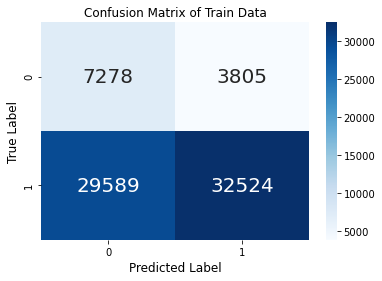

In [40]:
# For Train Data

best_t2 = calc_best_threshold(tr_thresh2, tr_fpr2, tr_tpr2)
cm2 = metrics.confusion_matrix(y_train,calc_predictions(y_tr_prob2, best_t2))  # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Confusion Matrix of Train Data of set 2 :\n",cm2)
sns.heatmap(cm2, annot=True, fmt='d',cmap='Blues',annot_kws = {"size":20})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Confusion Matrix of Train Data',size=12)

the maximum value of tpr*(1-fpr) 0.3271361010349812 for threshold 0.497 

Confusion Matrix of Train Data of set 2 :
 [[ 3440  2019]
 [14711 15882]]


Text(0.5, 1.0, 'Confusion Matrix of Train Data')

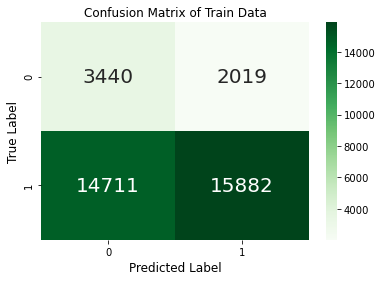

In [41]:
# For Test data

best_t2 = calc_best_threshold(te_thresh2, te_fpr2, te_tpr2)
cm2 = metrics.confusion_matrix(y_test,calc_predictions(y_te_prob2, best_t2))  # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("Confusion Matrix of Train Data of set 2 :\n",cm2)
sns.heatmap(cm2, annot=True, fmt='d',cmap='Greens',annot_kws = {"size":20})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Confusion Matrix of Train Data',size=12)

### Getting All the False Positive Data Points

In [42]:
pred = calc_predictions(y_te_prob2,best_t2)

fp_count = []
for i in range(len(y_test)):
    if(y_test[i]==0) & (pred[i] == 1):
        fp_count.append(i)
len(fp_count)

2019

In [43]:
col = X_test.columns
X_test_fp2 = pd.DataFrame(columns=col)         # creating FALSE POSITIVE DF
X_test_fp2 = X_test.iloc[fp_count]
print(X_test_fp2.shape)

X_test_fp2.head(1)

(2019, 12)


school_state teacher_prefix project_grade_category  \
69487           sc            mrs             grades_3_5   

       teacher_number_of_previously_posted_projects  \
69487                                            10   

                     clean_categories   clean_subcategories  \
69487  literacy_language math_science  literacy mathematics   

                                                   essay   price    neg  \
69487  many students english language learners hard w...  228.89  0.039   

         pos    neu  compound  
69487  0.242  0.719    0.9794

### WordCloud for Essay for False Positive Dataset

In [44]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
sw = set(STOPWORDS)
for e in X_test_fp2['essay']:
    val = str(e)                                       
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for words in tokens:
        comment_words = comment_words + words + ' '

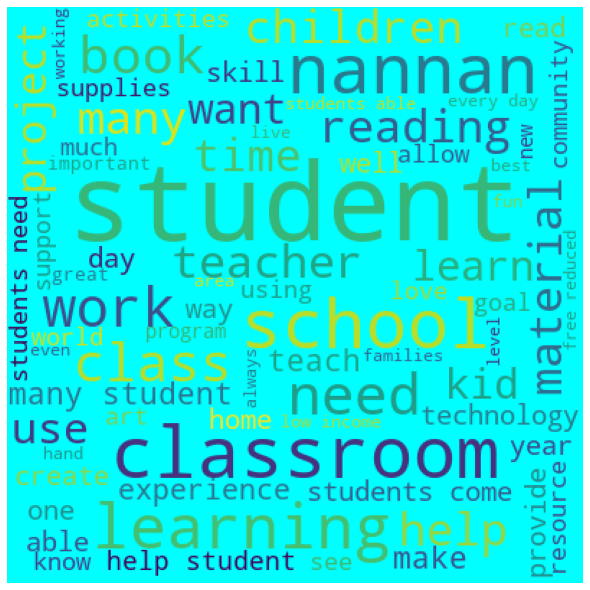

In [45]:
wrdcld = WordCloud(width = 400, height = 400, background_color ='cyan', stopwords = sw, min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wrdcld) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Box Plot for 'price' Of these False Positive Points


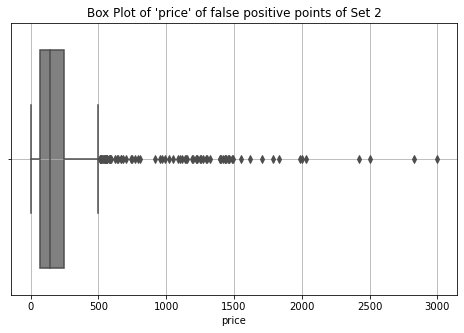

In [46]:
plt.figure(figsize=(8,5))
sns.boxplot('price',data=X_test_fp2,color='grey').set_title("Box Plot of 'price' of false positive points of Set 2")
plt.grid()

### PDF Plot for 'teacher_number_of_previously_posted_projects' Of these False Positive Points


PDFs :  [0.84596335 0.08667657 0.03219416 0.01287766 0.01040119 0.00396236
 0.00396236 0.00198118 0.00099059 0.00099059]

bins :  [  0.   24.8  49.6  74.4  99.2 124.  148.8 173.6 198.4 223.2 248. ]


Text(0.5, 0, 'teacher_number_of_previously_posted_projects')

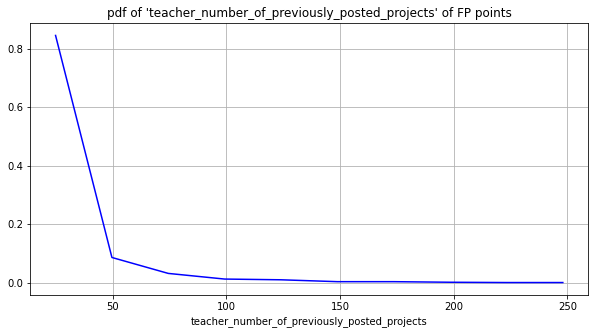

In [47]:
plt.figure(figsize=(10,5))
plt.grid()
counts, bin_edges = np.histogram(X_test_fp2['teacher_number_of_previously_posted_projects'], bins=10, 
                                density = True)
pdf = counts/(sum(counts))
print("PDFs : ",pdf);
print("\nbins : ",bin_edges)
plt.plot(bin_edges[1:],pdf,color="blue")
plt.title("pdf of 'teacher_number_of_previously_posted_projects' of FP points")
plt.xlabel('teacher_number_of_previously_posted_projects')

# <font color='red'> <b>Task - 2</b></font>

### Features with Non-Zero Feature Importance

In [48]:
print(X_tr_1.shape)
print(X_te_1.shape)

(73196, 5105)
(36052, 5105)


In [49]:
clf_feat = DecisionTreeClassifier(class_weight='balanced', max_depth=None, min_samples_split=500, random_state = 0)
clf_feat.fit(X_tr_1,y_train)

features = clf_feat.feature_importances_
len(features)

5105

In [50]:
non_0_feat = []
for i in range(len(features)):
    if features[i]>0:
        non_0_feat.append(i)
        
print("Number of non-zero importance features : " ,len(non_0_feat))

Number of non-zero importance features :  1207


In [51]:
X_tr_new = X_tr_1[:,non_0_feat]
X_te_new = X_te_1[:,non_0_feat]

print("Shape of non-zero importance training data : ", X_tr_new.shape)
print("Shape of non-zero importance test data : ", X_te_new.shape)


Shape of non-zero importance training data :  (73196, 1207)
Shape of non-zero importance test data :  (36052, 1207)


### Fitting Modified Data

In [52]:
dct_new = DecisionTreeClassifier(class_weight='balanced', random_state = 0) 
clf_new = GridSearchCV(dct_new, param, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf_new.fit(X_tr_new,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [53]:
train_auc_new = clf_new.cv_results_['mean_train_score']
train_auc_std_new = clf_new.cv_results_['std_train_score']
test_auc_new = clf_new.cv_results_['mean_test_score'] 
test_auc_std_new = clf_new.cv_results_['std_test_score']

max_depth_new = clf.best_params_['max_depth']
min_samples_split_new = clf.best_params_['min_samples_split']

print('Best score for modified dataset: ',clf_new.best_score_)
print('Best max_depth for modified dataset: ',max_depth_new)
print('Best min_samples_split for modified dataset: ',min_samples_split_new)

Best score for modified dataset:  0.653742158026761
Best max_depth for modified dataset:  10
Best min_samples_split for modified dataset:  500


### Hyperparameter v/s Auc Plot

In [54]:
from itertools import repeat

x1= max_depth
y1= min_samples_split
z1= train_auc_new
z2= test_auc_new

In [55]:
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name="train_auc")
trace2 = go.Scatter3d(x=x1,y=y1,z=z2, name="test_auc")
values = [trace1, trace2]

lay = go.Layout(scene = dict(
        xaxis = dict(title='max_depth'),
        yaxis = dict(title='min_samples_split'),
        zaxis = dict(title='AUC SCORE'),))

fig = go.Figure(data=values, layout=lay)
offline.iplot(fig, filename='3d-scatter-colorscale')

### ROC Plot : Train And Test Data

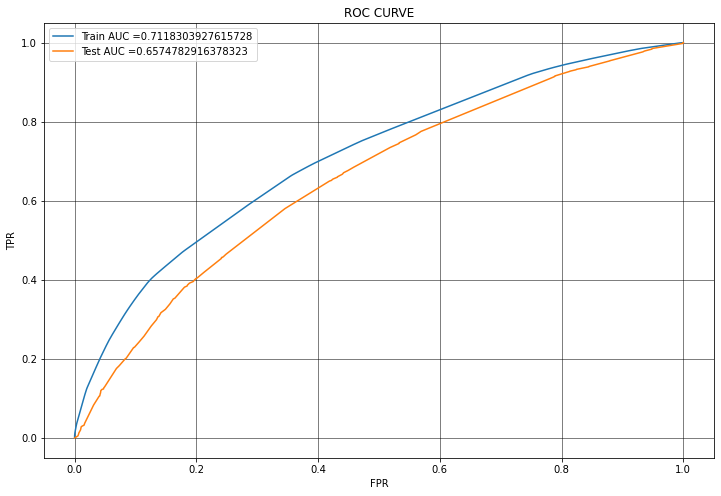

In [56]:
model = DecisionTreeClassifier(class_weight='balanced',max_depth = max_depth_new, min_samples_split = min_samples_split_new, random_state = 0)
model.fit(X_tr_new,y_train)

y_tr_prob_new = clf_new.predict_proba(X_tr_new)[:,1]
y_te_prob_new = clf_new.predict_proba(X_te_new )[:,1]

tr_fpr_new, tr_tpr_new, tr_thres_new = roc_curve(y_train, y_tr_prob_new)
te_fpr_new, te_tpr_new, te_thres_new = roc_curve(y_test, y_te_prob_new)

plt.figure(figsize=(12,8))
plt.plot(tr_fpr_new, tr_tpr_new, label="Train AUC ="+str(auc(tr_fpr_new, tr_tpr_new)))
plt.plot(te_fpr_new, te_tpr_new, label="Test AUC ="+str(auc(te_fpr_new, te_tpr_new)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.grid(color='black',lw=0.5)

### Confusion Matrix

the maximum value of tpr*(1-fpr) 0.4275781683675348 for threshold 0.512 

Confusion Matrix of modified Train Data :
 [[ 7158  3925]
 [20992 41121]]


Text(0.5, 1.0, 'Confusion Matrix of Train Data')

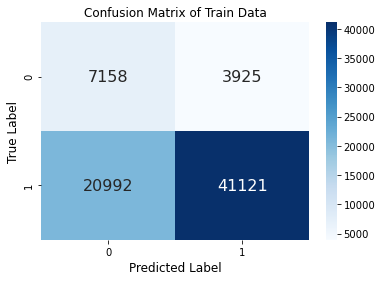

In [57]:
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

# Train Data

best_t_new = calc_best_threshold(tr_thres_new, tr_fpr_new, tr_tpr_new)
cm_new = metrics.confusion_matrix(y_train,calc_predictions(y_tr_prob_new, best_t_new))  

print("Confusion Matrix of modified Train Data :\n",cm_new)
sns.heatmap(cm_new, annot=True, fmt='d',cmap='Blues',annot_kws = {"size":16})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Confusion Matrix of Train Data',size=12)

the maximum value of tpr*(1-fpr) 0.37981345078280976 for threshold 0.524 

Confusion Matrix of modified Test Data:
 [[ 3572  1887]
 [12835 17758]]


Text(0.5, 1.0, 'Confusion Matrix of Train Data')

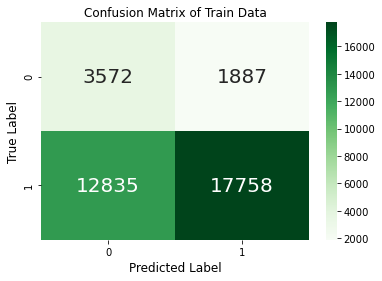

In [58]:
# For Test data

best_t_new = calc_best_threshold(te_thres_new, te_fpr_new, te_tpr_new)
cm_new = metrics.confusion_matrix(y_test,calc_predictions(y_te_prob_new, best_t_new))

print("Confusion Matrix of modified Test Data:\n",cm_new)
sns.heatmap(cm_new, annot=True, fmt='d',cmap='Greens',annot_kws = {"size":20})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Confusion Matrix of Train Data',size=12)

### False Positive Data Points

In [59]:
pred_new = calc_predictions(y_te_prob_new,best_t_new)

fp_count_new = []

for i in range(len(y_test)):
    if(y_test[i]==0) & (pred_new[i] == 1):
        fp_count_new.append(i)

len(fp_count_new)

1887

In [60]:
cols_new = X_test.columns
X_te_fp_new = pd.DataFrame(columns=cols_new) # MAKING THE FALSE POSITIVE DATAFRAME
X_te_fp_new = X_test.iloc[fp_count_new]    
print(X_te_fp_new.shape)

(1887, 12)


### WordCloud for Essay False Positive Dataset

In [61]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = ' '
sw = set(STOPWORDS)
for e in X_te_fp_new['essay']:
    val = str(e)                                       
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for words in tokens:
        comment_words = comment_words + words + ' '

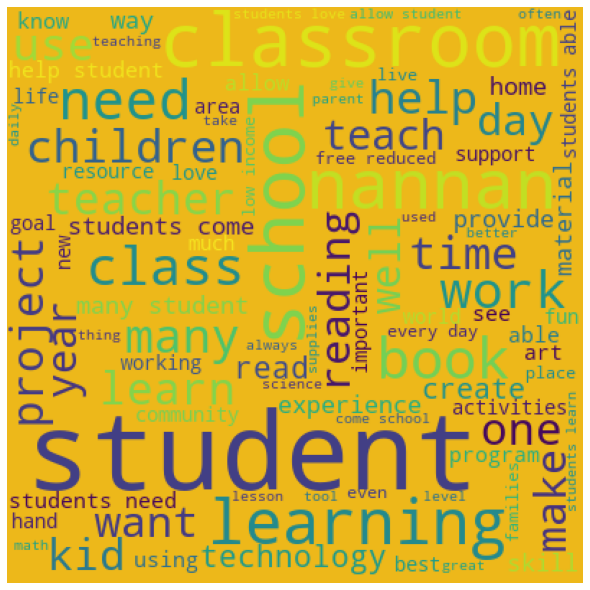

In [62]:
wrdcld = WordCloud(width = 400, height = 400, background_color ='#edb81a', stopwords = sw, min_font_size = 10).generate(comment_words)
# For more color options Google hex color picker

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wrdcld) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Box Plot for 'price' of False Positive Data Points


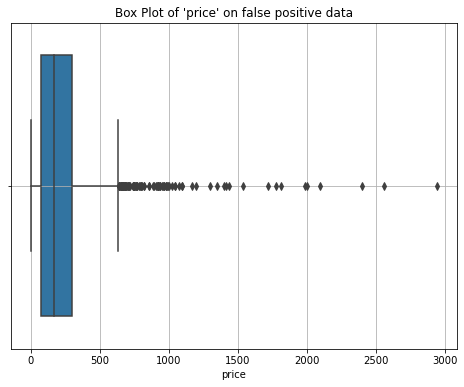

In [63]:
plt.figure(figsize=(8,6))
sns.boxplot('price',data=X_te_fp_new,orient="v").set_title("Box Plot of 'price' on false positive data")
plt.grid()

### PDF Plot for 'teacher_number_of_previously_posted_projects' Of these False Positive Points


PDFs :  [0.84154743 0.0927398  0.03126656 0.0127186  0.01059883 0.00370959
 0.00423953 0.00105988 0.00105988 0.00105988]

bins :  [  0.   24.8  49.6  74.4  99.2 124.  148.8 173.6 198.4 223.2 248. ]


Text(0.5, 0, 'teacher_number_of_previously_posted_projects')

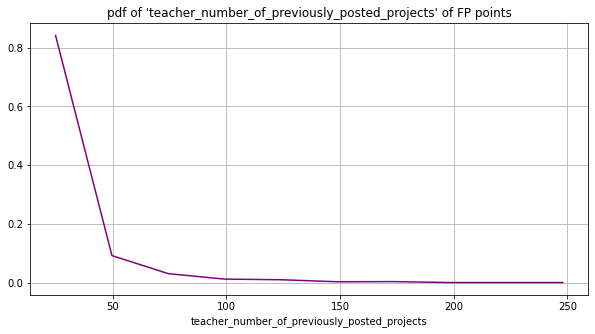

In [64]:
plt.figure(figsize=(10,5))
plt.grid()
counts, bin_edges = np.histogram(X_te_fp_new['teacher_number_of_previously_posted_projects'], bins=10, 
                                density = True)
pdf = counts/(sum(counts))
print("PDFs : ",pdf);
print("\nbins : ",bin_edges)
plt.plot(bin_edges[1:],pdf,color="purple")
plt.title("pdf of 'teacher_number_of_previously_posted_projects' of FP points")
plt.xlabel('teacher_number_of_previously_posted_projects')

## Summary

In [67]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
from prettytable import ALL as ALL
table = PrettyTable(hrules=ALL)
table.field_names = ["S.No.","Vectorizer", "Model", "Hyper-Parameter", "Test-AUC Score"]
table.add_row([1,"TF-IDF", "DECSION TREE", "max_depth =10, min_samples_split=500", np.round(clf.best_score_,3)])
table.add_row([2,"TF-IDF W2V", "DECSION TREE"," max_depth =10 , min_samples_split=500", np.round(clf2.best_score_,3)])
table.add_row([3,"TF-IDF NON ZERO FEATURES", "DECSION TREE", "max_depth =10 , min_samples_split=500", np.round(clf_new.best_score_,3)])
print(table)

+-------+--------------------------+--------------+----------------------------------------+----------------+
| S.No. |        Vectorizer        |    Model     |            Hyper-Parameter             | Test-AUC Score |
+-------+--------------------------+--------------+----------------------------------------+----------------+
|   1   |          TF-IDF          | DECSION TREE |  max_depth =10, min_samples_split=500  |     0.652      |
+-------+--------------------------+--------------+----------------------------------------+----------------+
|   2   |        TF-IDF W2V        | DECSION TREE |  max_depth =10 , min_samples_split=500 |     0.615      |
+-------+--------------------------+--------------+----------------------------------------+----------------+
|   3   | TF-IDF NON ZERO FEATURES | DECSION TREE | max_depth =10 , min_samples_split=500  |     0.654      |
+-------+--------------------------+--------------+----------------------------------------+----------------+
